# Experiment 1: Feature Selection by using Heart Dataset

In [2]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
### Univariate selection
x=df.iloc[:,:-1]
y=df['target']

In [4]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

SelectKBest selects the top features based on their scores using a statistical test, such as chi squared test or ANOVA F-test. The score measures the dependency between each feature and the target variable,and the K features with the highest scores with the highest scores are selected.

In [7]:
## Apply SelectKBest Algorithm
ordered_rank_features = SelectKBest(score_func=chi2,k=8)
ordered_rank_features

SelectKBest(k=8, score_func=<function chi2 at 0x00000285A3428A40>)

In [8]:
ordered_feature = ordered_rank_features.fit(x,y)
ordered_feature

SelectKBest(k=8, score_func=<function chi2 at 0x00000285A3428A40>)

In [9]:
dfscore=pd.DataFrame(ordered_feature.scores_,columns=['Score'])
dfcolumns=pd.DataFrame(x.columns)
#dfcolumns

In [10]:
features_rank = pd.concat([dfcolumns,dfscore],axis=1)

In [11]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,age,23.286624
1,sex,7.576835
2,cp,62.598098
3,trestbps,14.823925
4,chol,23.936394
5,fbs,0.202934
6,restecg,2.978271
7,thalach,188.320472
8,exang,38.914377
9,oldpeak,72.644253


In [12]:
features_rank.nlargest(10,'Score')

,Features,Score
7,thalach,188.320472
9,oldpeak,72.644253
11,ca,66.440765
2,cp,62.598098
8,exang,38.914377
4,chol,23.936394
0,age,23.286624
3,trestbps,14.823925
10,slope,9.804095
1,sex,7.576835


## Correlation

In [13]:
import matplotlib .pyplot as plt
import seaborn as sns
corr = df.iloc[:,:-1].corr()

<Axes: >

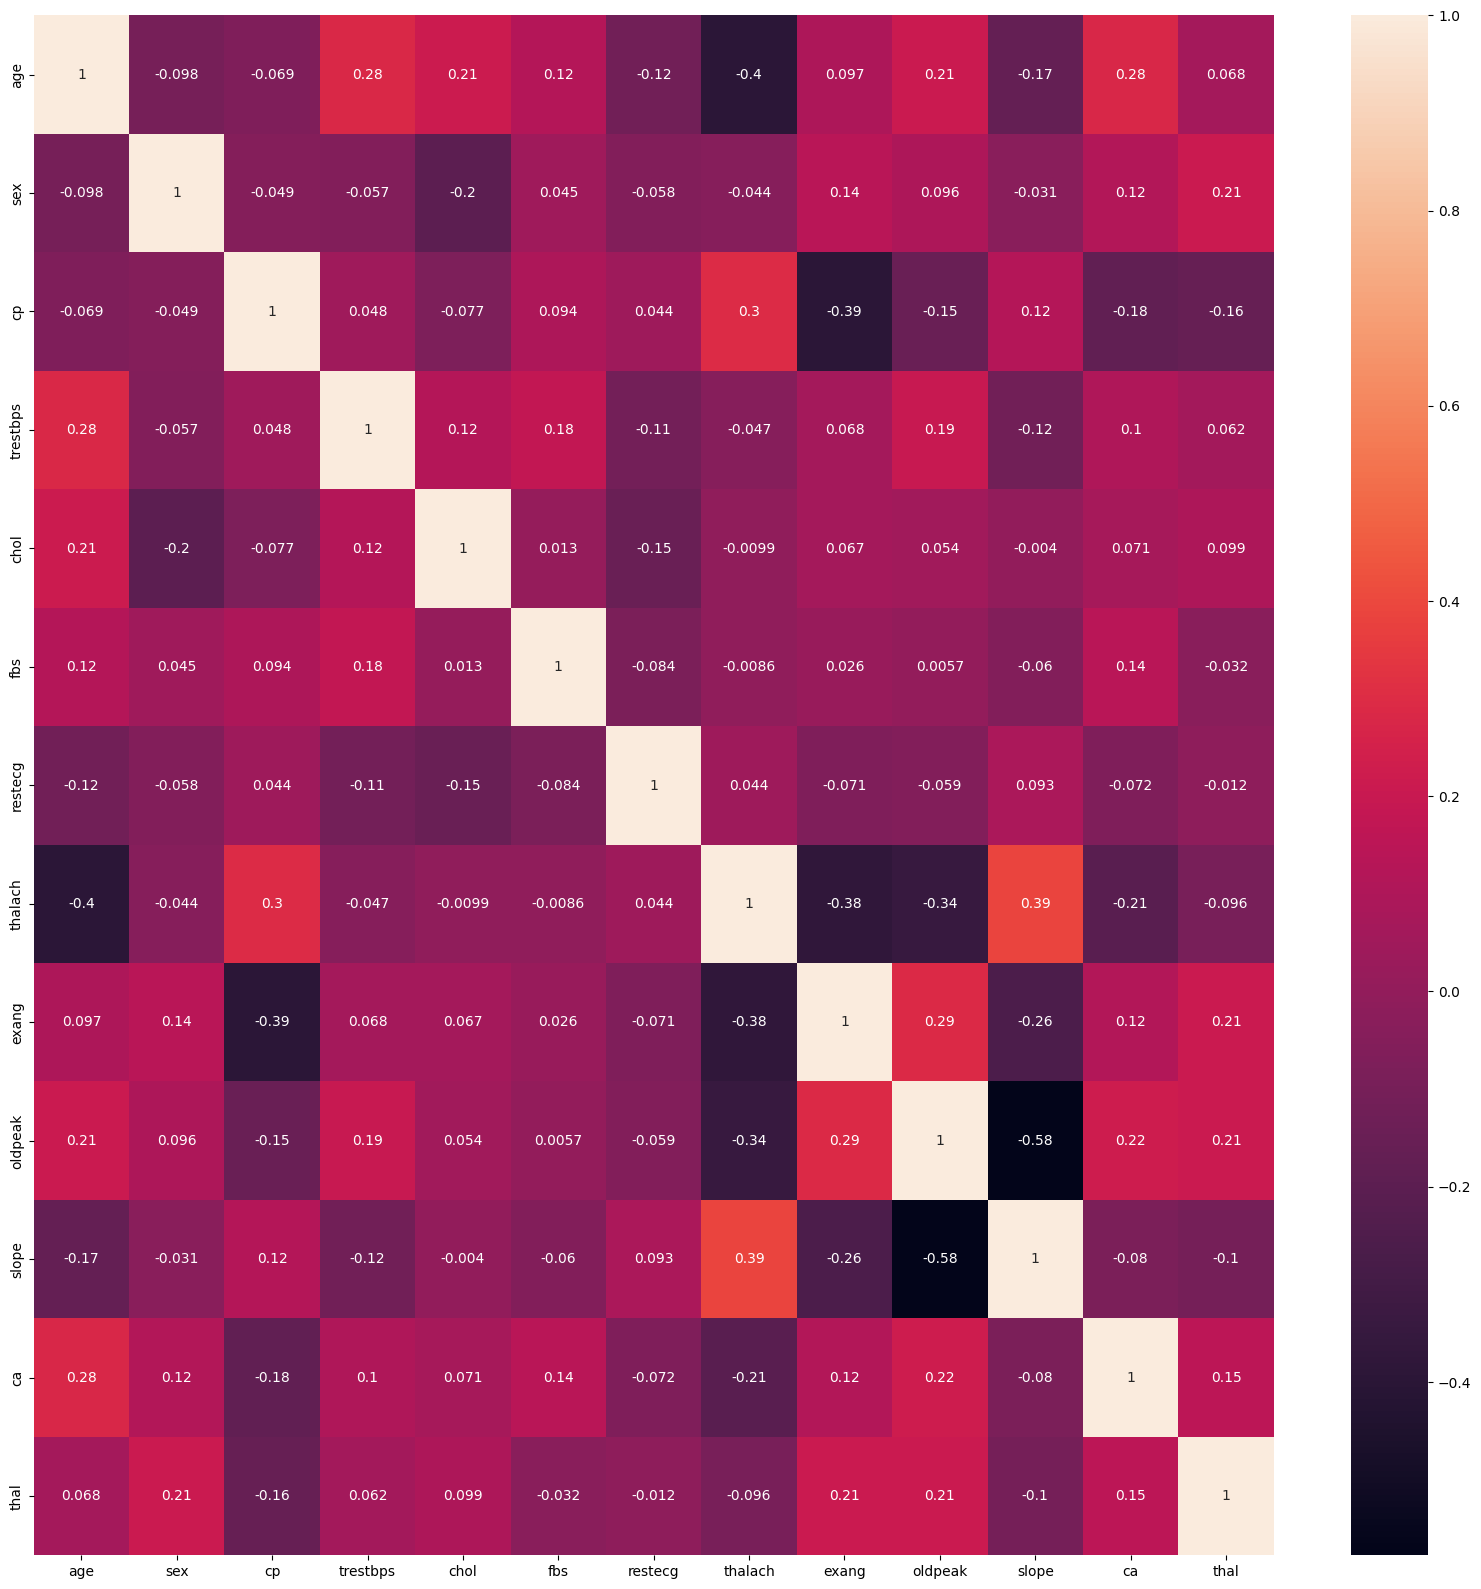

In [14]:
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)